In [1]:
import os 
import uuid
from agents import Agent, Runner, ModelSettings,trace
from helpers.helper_agents import recommender_agent, responsive_agent,query_rewrite, travel_info_agent
from helpers.travel_agents import f_agent, h_agent
from helpers.function_tools import flight_search_2, hotels_search2
from helpers.helper_functions import assemble_conversation
from agents.extensions.visualization import draw_graph
import nest_asyncio
from dotenv import load_dotenv
load_dotenv()

os.environ["OPENAI_API_KEY"] = os.environ['OPENAI_API_KEY_MALI']
nest_asyncio.apply()

myuuid = str(uuid.uuid4())

END OF THE SCRIPT


In [2]:
print(myuuid)

fd2b1e44-8be7-4005-b515-a80d7228cda5


In [3]:
travel_info_agent.tools = [
        f_agent.as_tool(
            tool_name = "Flight_Assistant_agent", 
            tool_description="Arranges flight ticket according to user needs"
        ),
        h_agent.as_tool(
            tool_name = "Hotels_Assistant_agent", 
            tool_description="Arranges hotel accomodations according to user needs"
        ),
]
travel_info_agent.model = 'gpt-4o'

In [4]:
query_rewrite.handoffs = [travel_info_agent,recommender_agent]
query_rewrite.model = 'gpt-4o'

In [5]:
ank = "ankara(ESB)"
ist = "istanbul(SAW)"
amst = "amsterdam(AMS)"
pekin = "Peking(PEK)"

start_point = ank 
dest_point = amst



query_1 = f"""I want to travel from {start_point} to {dest_point}. 
The outbound date is 2025-05-05 and the return date will be 2025-05-11. 
tell me the cheapest travel and hotels options in Amsterdam.
""".strip()

In [6]:
with trace(myuuid): 
    res = Runner.run_sync(query_rewrite,query_1)

In [7]:
print(res.final_output)

**Subquestions:**

1. What are the available flight options from Ankara Esenboğa Airport (ESB) to Amsterdam Airport Schiphol (AMS) for the outbound date of May 5, 2025, and the return date of May 11, 2025? Please include the cheapest options, flight times, and any layovers.

2. What are the cheapest hotel options in Amsterdam for the dates of May 5, 2025, to May 11, 2025? Include details such as location, amenities, and pricing.

3. Are there any package deals or discounts available that combine flights and hotel stays for the specified dates and locations?

4. What are the transportation options from Amsterdam Airport Schiphol (AMS) to the recommended hotels, including costs and travel times?

**Final Detailed Query:**

"Please provide the cheapest travel and accommodation options for a trip from Ankara Esenboğa Airport (ESB) to Amsterdam Airport Schiphol (AMS) with the following details:
- Outbound flight on May 5, 2025, and return flight on May 11, 2025, including the cheapest avail

In [8]:
with trace(myuuid): 
    new_input = "what is the total price for the cheapest option"
    input = assemble_conversation(res,new_input)
    res = Runner.run_sync(query_rewrite,input)
    print(res.final_output)

Here are the cheapest travel and accommodation options for your trip from Ankara to Amsterdam:

### Flight Options
- **Cheapest Flight:** $320
  - **Total Duration:** 1650 minutes
  - **Details:** Multiple layovers, specific details not provided.

### Hotel Options
1. **Amigo Budget Hostel**
   - **Price per night:** $88
   - **Total for 6 nights:** $528
   - **Amenities:** Free Wi-Fi, Parking

2. **via Amsterdam**
   - **Price per night:** $90
   - **Total for 6 nights:** $540
   - **Amenities:** Breakfast, Free Wi-Fi, Parking, Air conditioning, Bar, Restaurant, Kitchen in some rooms, Child-friendly, Smoke-free property

### Total Cost
- **Cheapest Flight + Amigo Budget Hostel:** $320 + $528 = **$848**
- **Cheapest Flight + via Amsterdam:** $320 + $540 = **$860**

These are the most cost-effective options for your travel and stay in Amsterdam. Let me know if you need further assistance!


In [9]:
with trace(myuuid): 
    new_input = "Please calculate the total price for the whole trip"
    input = assemble_conversation(res,new_input)
    res = Runner.run_sync(query_rewrite,input)
    print(res.final_output)

The total price for the whole trip, including the cheapest flight and hotel options, is as follows:

- **Cheapest Flight:** $320
- **Amigo Budget Hostel (6 nights):** $528

**Total Cost:** $320 (flight) + $528 (hotel) = **$848**

This is the total cost for your trip from Ankara to Amsterdam, including flights and accommodation.


In [10]:
with trace(myuuid): 
    new_input = "I have changed my mind, I want to go london"
    input = assemble_conversation(res,new_input)
    res = Runner.run_sync(query_rewrite,input)
    print(res.final_output)

1. What are the available flight options from Ankara Esenboğa Airport (ESB) to London for the outbound date of May 5, 2025, and the return date of May 11, 2025? Please include the cheapest options, flight times, and any layovers.

2. What are the cheapest hotel options in London for the dates of May 5, 2025, to May 11, 2025? Include details such as location, amenities, and pricing.

3. Are there any package deals or discounts available that combine flights and hotel stays for the specified dates and locations?

4. What are the transportation options from London airports to the recommended hotels, including costs and travel times?

**Final Detailed Query:**

"Please provide the cheapest travel and accommodation options for a trip from Ankara Esenboğa Airport (ESB) to London with the following details:
- Outbound flight on May 5, 2025, and return flight on May 11, 2025, including the cheapest available flights, flight times, and any layovers.
- Budget-friendly hotel options in London for

In [ ]:
with trace(myuuid): 
    new_input = "same dates for london(LHR) and same starting point"
    input = assemble_conversation(res,new_input)
    res = Runner.run_sync(query_rewrite,input)
    print(res.final_output)

I couldn't find flight options from Ankara to London for the specified dates. However, here are some budget-friendly hotel options in London:

### Hotel Options
1. **St Christopher's Inn London Bridge: The Inn**
   - **Price per night:** $68
   - **Total for 6 nights:** $408
   - **Amenities:** Free breakfast, Free Wi-Fi, Smoke-free property

2. **Safestay London Kensington Holland Park**
   - **Price per night:** $70
   - **Total for 6 nights:** $420
   - **Amenities:** Breakfast, Free Wi-Fi, Bar, Restaurant, Child-friendly, Smoke-free property

3. **ibis budget London Barking**
   - **Price per night:** $77
   - **Total for 6 nights:** $462
   - **Amenities:** Breakfast ($), Free Wi-Fi, Parking ($), Air conditioning, Pet-friendly, Restaurant, Accessible, Child-friendly, Smoke-free property

If you have flexibility with your travel dates or need further assistance, please let me know!


In [13]:
with trace(myuuid): 
    new_input = "same dates for london(LHR) and same starting point"
    input = assemble_conversation(res,new_input)
    res = Runner.run_sync(query_rewrite,input)
    print(res.final_output)

Here are the cheapest travel options for your trip from Ankara to London Heathrow:

### Flight Options
1. **Cheapest Flight:** $420
   - **Total Duration:** 1125 minutes
   - **Details:** 
     - **Segment 1:** Turkish Airlines (TK 2185)
       - **Departure:** Ankara (ESB) - 2025-05-05 23:55
       - **Arrival:** Istanbul (IST) - 2025-05-06 01:20
     - **Segment 2:** Turkish Airlines (TK 1971)
       - **Departure:** Istanbul (IST) - 2025-05-06 14:45
       - **Arrival:** London Heathrow (LHR) - 2025-05-06 16:40

### Hotel Options
1. **St Christopher's Inn London Bridge: The Inn**
   - **Price per night:** $68
   - **Total for 6 nights:** $408
   - **Amenities:** Free breakfast, Free Wi-Fi, Smoke-free property

2. **Safestay London Kensington Holland Park**
   - **Price per night:** $70
   - **Total for 6 nights:** $420
   - **Amenities:** Breakfast, Free Wi-Fi, Bar, Restaurant, Child-friendly, Smoke-free property

### Total Cost
- **Cheapest Flight + St Christopher's Inn:** $420 (fl

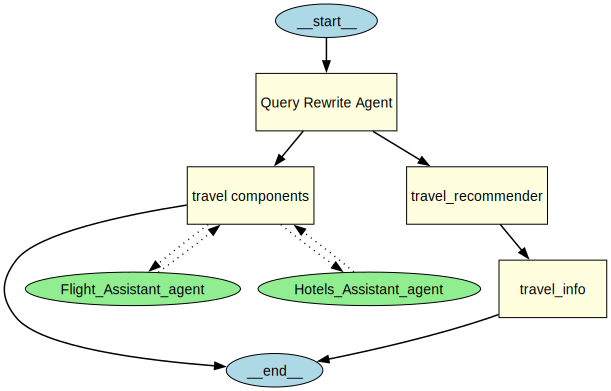

In [12]:
draw_graph(query_rewrite)